In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
first_inventory=pd.read_excel(r"C:/Users/bhava/Desktop/C.5/Inventory Dataset.xlsx")
second_inventory=pd.read_excel(r"C:/Users/bhava/Desktop/C.5/New Inventory.xlsx")

In [4]:
merged=first_inventory.merge(second_inventory)

In [5]:
selected_features=merged[['Item Number','Inventory Receive','Total Item Qty']]

In [6]:
grouped=selected_features.groupby(["Item Number","Inventory Receive"]).sum()

In [7]:
grouped

Total Item Qty
Item Number Inventory Receive                
064-01-1346 2023-07-07                   1072
            2023-07-09                   2464
            2023-07-10                   2000
            2023-08-04                   1400
            2023-08-16                   1000
...                                       ...
064-18-9938 2023-08-04                   1368
            2023-08-16                   2084
            2023-09-08                   2084
            2023-09-29                   1976
            2023-10-13                   1976

[909 rows x 1 columns]

In [8]:
skeleton=grouped.unstack()

In [9]:
df=pd.DataFrame()
for i in grouped.index:
    df[i[0],i[1]]=grouped.loc[i[0],i[1]]

In [10]:
dates=[]
for i in df.columns.get_level_values(0).to_list():
    dates.append(str(i[1].date()))
skeleton.columns=set(dates)

In [11]:
foo=skeleton.fillna(0).sort_index(axis=1)
foo.columns=pd.DatetimeIndex(foo.columns)

In [12]:
flag=[]
k=0
for i in range(len(foo.columns)):
    if (foo.columns[i].date()-foo.columns[k].date()).days==7:
        flag.append(sum(foo[foo.columns[0]],foo[foo.columns[i]]))
        k=i

In [13]:
container=pd.DataFrame()
for i in flag:
    container[i.name]=i

In [14]:
container # inventory on a weekly basis.

,2023-07-14,2023-07-21,2023-07-28,2023-08-04
Item Number,,,,
064-01-1346,3848.0,1848.0,1848.0,1848.0
064-01-1347,3848.0,1848.0,1848.0,1848.0
064-01-1348,3492.0,1848.0,1848.0,1848.0
064-01-1349,3752.0,1848.0,1848.0,1848.0
064-01-1351,2496.0,1848.0,1848.0,1848.0
...,...,...,...,...
064-18-9089,1848.0,3448.0,3672.0,1848.0
064-18-9182,1848.0,1848.0,6076.0,1848.0
064-18-9667,1848.0,1848.0,1848.0,1848.0


Task 1 accomplished
-------------------

In [15]:
# container['2023-07-14'].value_counts()
# container['2023-07-21'].value_counts()
# container['2023-07-28'].value_counts()
# container['2023-08-04'].value_counts()

In [16]:
import matplotlib.pyplot as plt

In [17]:
foo.columns

DatetimeIndex(['2023-07-07', '2023-07-09', '2023-07-10', '2023-07-14',
               '2023-07-21', '2023-07-28', '2023-08-04', '2023-08-16',
               '2023-08-18', '2023-08-22', '2023-08-25', '2023-09-08',
               '2023-09-29', '2023-10-13'],
              dtype='datetime64[ns]', freq=None)

In [18]:
match=dict()
for i in foo.columns:
    if i in match:
        match[i]+=foo[i].sum().sum()
    else:
        match[i]=foo[i].sum().sum()

In [19]:
match

{Timestamp('2023-07-07 00:00:00'): 1848.0,
 Timestamp('2023-07-09 00:00:00'): 70284.0,
 Timestamp('2023-07-10 00:00:00'): 210960.0,
 Timestamp('2023-07-14 00:00:00'): 166708.0,
 Timestamp('2023-07-21 00:00:00'): 16336.0,
 Timestamp('2023-07-28 00:00:00'): 157028.0,
 Timestamp('2023-08-04 00:00:00'): 23200.0,
 Timestamp('2023-08-16 00:00:00'): 341268.0,
 Timestamp('2023-08-18 00:00:00'): 192178.0,
 Timestamp('2023-08-22 00:00:00'): 413044.0,
 Timestamp('2023-08-25 00:00:00'): 9514.0,
 Timestamp('2023-09-08 00:00:00'): 183554.0,
 Timestamp('2023-09-29 00:00:00'): 94482.0,
 Timestamp('2023-10-13 00:00:00'): 3600.0}

In [20]:
convert_list = [(key.month, value) for key, value in match.items()]

In [21]:
convert_list

[(7, 1848.0),
 (7, 70284.0),
 (7, 210960.0),
 (7, 166708.0),
 (7, 16336.0),
 (7, 157028.0),
 (8, 23200.0),
 (8, 341268.0),
 (8, 192178.0),
 (8, 413044.0),
 (8, 9514.0),
 (9, 183554.0),
 (9, 94482.0),
 (10, 3600.0)]

In [22]:
final_dict={}
for i in range(len(convert_list)):
    if convert_list[i][0] in final_dict:
        final_dict[convert_list[i][0]] += convert_list[0][1]
    else:
        final_dict[convert_list[i][0]] = convert_list[0][1]
print(final_dict)

{7: 11088.0, 8: 9240.0, 9: 3696.0, 10: 1848.0}


In [23]:
labels = list(final_dict.keys())
heights = list(final_dict.values())

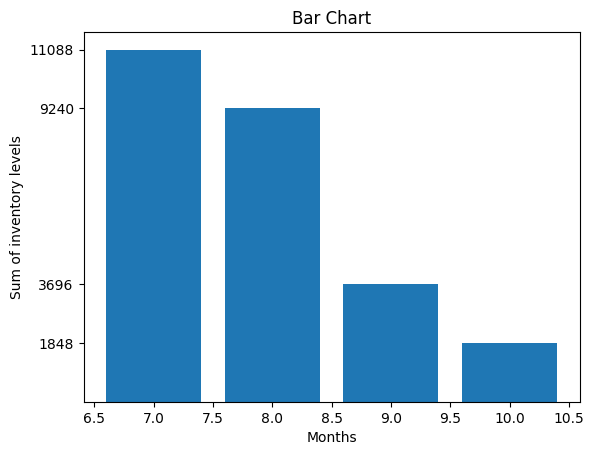

In [24]:
bars = plt.bar(labels,heights)

plt.xlabel('Months')
plt.ylabel('Sum of inventory levels')
plt.title('Bar Chart')

# total summation
plt.yticks(heights)

plt.show()

Task 2 accomplished
-------------------
The end